In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score 
test = pd.read_csv('Rossmann_test.csv')
train=pd.read_csv('Rossmann_train.csv')
store=pd.read_csv('Rossmann_store.csv')

train["StateHoliday"].replace("0",0,inplace=True)

closed = train[train['Open'] == 0]['DayOfWeek']
closed=pd.DataFrame(closed, columns=['DayOfWeek'])

train = train[(train["Open"] != 0) & (train['Sales'] != 0)]

train['AvgPurchase'] = train.Sales / train.Customers
train.AvgPurchase.fillna(0, inplace=True)

train["Date"] = pd.to_datetime(train["Date"])
train.set_index("Date", inplace=True)
train["Year"] = train.index.year.astype('int64') 
train["Month"] = train.index.month.astype('int64')

def season(month):
    if month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Autumn"
    elif month in [12, 1, 2]:
        return "Winter"

train["Season"] = train["Month"].apply(season)

store_sales = train.groupby('Store')['Sales'].sum().reset_index()
sales_threshold = store_sales['Sales'].quantile(0.8)

store_sales20 = store_sales[store_sales['Sales'] >= sales_threshold]

# Filters the train dataframe based on the top 20% stores
final_train = train[train['Store'].isin(store_sales20['Store'])]

store.Promo2SinceWeek.fillna(0, inplace=True)
store.Promo2SinceYear.fillna(0, inplace=True)
store.PromoInterval.fillna(0, inplace=True)

from sklearn.impute import KNNImputer

# Create a DataFrame with the columns that need imputation
columns_to_impute = ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'CompetitionDistance']
col = store[columns_to_impute].copy() 

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Perform imputation
imputed_data = imputer.fit_transform(col)

# Create a DataFrame with the imputed data
imputed_df = pd.DataFrame(imputed_data, columns=columns_to_impute)

# Replace the missing values in the original DataFrame with the imputed values
store[columns_to_impute] = imputed_df

x = final_train.reset_index()

merged_sales = x.merge(store, how='left', on='Store')
merged_sales = merged_sales[merged_sales['Customers'] != 7388]
merged_sales.set_index('Date', inplace=True)

C:\Users\jhkan\AppData\Local\Temp\ipykernel_15472\2434102364.py:9: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train=pd.read_csv('Rossmann_train.csv')


In [2]:
merged_sales

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2015-07-31      4          5  13995       1498     1      1            0   
2015-07-31      7          5  15344       1414     1      1            0   
2015-07-31     24          5  14190       1082     1      1            0   
2015-07-31     25          5  14180       1586     1      1            0   
2015-07-31     27          5  13213       1263     1      1            0   
...           ...        ...    ...        ...   ...    ...          ...   
2013-01-01    676          2   3821        777     1      0            a   
2013-01-01    682          2   3375        566     1      0            a   
2013-01-01    733          2  10765       2377     1      0            a   
2013-01-01    769          2   5035       1248     1      0            a   
2013-01-01   1097          2   5961       1405     1      0            a   

            SchoolHoliday  AvgPurchase  Year  ...  Season StoreType  \
Date                                          ...                     
2015-07-31              1     9.342457  2015  ...  Summer         c   
2015-07-31              1    10.851485  2015  ...  Summer         a   
2015-07-31              1    13.114603  2015  ...  Summer         a   
2015-07-31              1     8.940731  2015  ...  Summer         c   
2015-07-31              1    10.461599  2015  ...  Summer         a   
...                   ...          ...   ...  ...     ...       ...   
2013-01-01              1     4.917632  2013  ...  Winter         b   
2013-01-01              1     5.962898  2013  ...  Winter         b   
2013-01-01              1     4.528818  2013  ...  Winter         b   
2013-01-01              1     4.034455  2013  ...  Winter         b   
2013-01-01              1     4.242705  2013  ...  Winter         b   

           Assortment CompetitionDistance  CompetitionOpenSinceMonth  \
Date                                                                   
2015-07-31          c               620.0                        9.0   
2015-07-31          c             24000.0                        4.0   
2015-07-31          c              4590.0                        3.0   
2015-07-31          a               430.0                        4.0   
2015-07-31          a                60.0                        1.0   
...               ...                 ...                        ...   
2013-01-01          b              1410.0                        9.0   
2013-01-01          a               150.0                        9.0   
2013-01-01          b               860.0                       10.0   
2013-01-01          b               840.0                        7.0   
2013-01-01          b               720.0                        3.0   

            CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  \
Date                                                            
2015-07-31                    2009.0       0              0.0   
2015-07-31                    2013.0       0              0.0   
2015-07-31                    2000.0       1             40.0   
2015-07-31                    2003.0       0              0.0   
2015-07-31                    2005.0       1              5.0   
...                              ...     ...              ...   
2013-01-01                    2008.0       0              0.0   
2013-01-01                    2006.0       0              0.0   
2013-01-01                    1999.0       0              0.0   
2013-01-01                    2008.2       1             48.0   
2013-01-01                    2002.0       0              0.0   

            Promo2SinceYear    PromoInterval  
Date                                          
2015-07-31              0.0                0  
2015-07-31              0.0                0  
2015-07-31           2011.0  Jan,Apr,Jul,Oct  
2015-07-31              0.0                0  
2015-07-31           2011.0  Jan,A

In [3]:
merged_sales.describe()

Store      DayOfWeek          Sales      Customers      Open  \
count  174992.000000  174992.000000  174992.000000  174992.000000  174992.0   
mean      573.637938       3.549191   10409.569563    1200.615811       1.0   
std       308.082928       1.745898    3672.181648     575.976007       0.0   
min         4.000000       1.000000     286.000000      40.000000       1.0   
25%       342.000000       2.000000    7885.000000     833.000000       1.0   
50%       545.000000       4.000000    9687.000000    1057.000000       1.0   
75%       831.000000       5.000000   12078.000000    1380.000000       1.0   
max      1114.000000       7.000000   41551.000000    5494.000000       1.0   

               Promo  SchoolHoliday    AvgPurchase           Year  \
count  174992.000000  174992.000000  174992.000000  174992.000000   
mean        0.443135       0.196049       9.268842    2013.835478   
std         0.496757       0.397007       2.300989       0.768571   
min         0.000000       0.000000       2.749075    2013.000000   
25%         0.000000       0.000000       7.661768    2013.000000   
50%         0.000000       0.000000       9.041123    2014.000000   
75%         1.000000       0.000000      10.764002    2014.000000   
max         1.000000       1.000000      25.226562    2015.000000   

               Month  CompetitionDistance  CompetitionOpenSinceMonth  \
count  174992.000000        174992.000000              174992.000000   
mean        5.930208          5500.704432                   7.023887   
std         3.338339          9266.551422                   2.727464   
min         1.000000            40.000000                   1.000000   
25%         3.000000           350.000000                   5.000000   
50%         6.000000          1710.000000                   7.000000   
75%         9.000000          5830.000000                   9.000000   
max        12.000000         75860.000000                  12.000000   

       CompetitionOpenSinceYear         Promo2  Promo2SinceWeek  \
count             174992.000000  174992.000000    174992.000000   
mean                2008.942009       0.335101         8.497034   
std                    3.867057       0.472027        14.613670   
min                 1994.000000       0.000000         0.000000   
25%                 2006.000000       0.000000         0.000000   
50%                 2009.400000       0.000000         0.000000   
75%                 2012.000000       1.000000        10.000000   
max                 2015.000000       1.000000        48.000000   

       Promo2SinceYear  
count    174992.000000  
mean        674.095999  
std         949.539909  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%        2010.000000  
max        2015.000000

# Exploratory Data Analysis: Customers and sales

[Text(0.5, 1.0, 'Customers and Sales')]

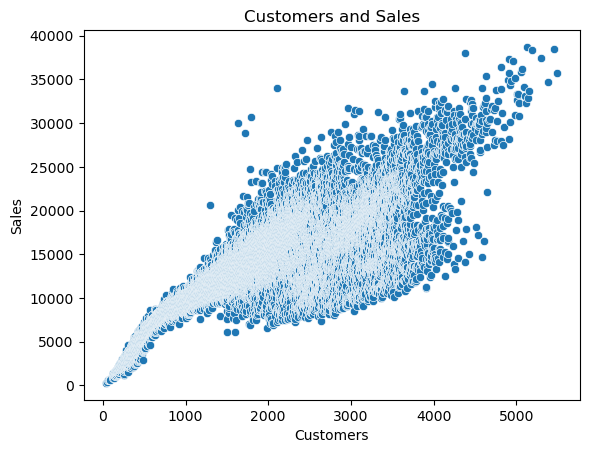

In [4]:
cus_sales = merged_sales.groupby(['Customers', 'Year', 'Season'])[['Sales']].agg(Sales=('Sales', 'mean')).reset_index()
sns.scatterplot(x="Customers", y="Sales", data=cus_sales).set(title = "Customers and Sales")

In [5]:
cus_sales

Customers  Year  Season    Sales
0             40  2013  Spring    286.0
1             50  2014  Spring    416.0
2             67  2015  Spring    649.0
3             75  2013  Spring    568.0
4             81  2013  Spring    699.0
...          ...   ...     ...      ...
27068       5192  2015  Spring  38367.0
27069       5297  2014  Spring  37403.0
27070       5387  2014  Summer  34692.0
27071       5458  2015  Spring  38484.0
27072       5494  2014  Autumn  35702.0

[27073 rows x 4 columns]

In [6]:
merged_sales.loc[merged_sales['Customers'] == 7388]

Empty DataFrame
Columns: [Store, DayOfWeek, Sales, Customers, Open, Promo, StateHoliday, SchoolHoliday, AvgPurchase, Year, Month, Season, StoreType, Assortment, CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2, Promo2SinceWeek, Promo2SinceYear, PromoInterval]
Index: []

[0 rows x 21 columns]

In [7]:
cus_sales.corr()

C:\Users\jhkan\AppData\Local\Temp\ipykernel_12984\3092724608.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cus_sales.corr()


Customers      Year     Sales
Customers   1.000000 -0.023025  0.842139
Year       -0.023025  1.000000 -0.004783
Sales       0.842139 -0.004783  1.000000

In [8]:
a = merged_sales['Customers'].corr(merged_sales['Sales'])
print(f"Correlation between Customers and Sales: {a}")

Correlation between Customers and Sales: 0.7554435392769543


Very strong positive correlation between customers and sales: 0.84, linear regression is suitable, need to test and train.

# What brings in customers?

potential correlations with customers:
-  holiday szns
- competitors distance
- promos

corr, heatmap

In [9]:
plt.figure(figsize=(20, 16))  # Adjust the figure size if needed
correlation_matrix = merged_sales.corr()
# Create a heatmap using the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title("Correlation Heatmap")
plt.show()

C:\Users\jhkan\AppData\Local\Temp\ipykernel_12984\2176816437.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_sales.corr()


In [10]:
cus_competitors = merged_sales['Customers'].corr(merged_sales['CompetitionDistance'])
cus_competitors

-0.2669452390215811

In [11]:
sns.scatterplot(x="CompetitionDistance", y="Customers", data=merged_sales).set(title = "Customers and Competition Distance")

[Text(0.5, 1.0, 'Customers and Competition Distance')]

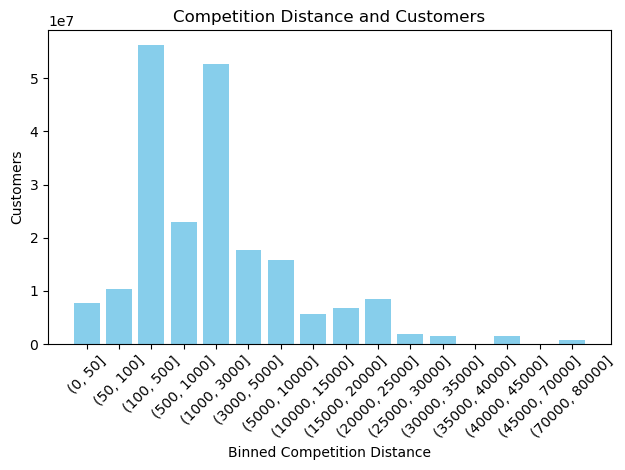

In [12]:
bins = [0,50, 100, 500, 1000, 3000 ,5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 70000, 80000]

# Create a new column with binned 'CompetitionDistance'
merged_sales['CompDis_bins'] = pd.cut(merged_sales['CompetitionDistance'], bins=bins)

# Group the data by bins and calculate the sum of 'Customers' in each bin
grouped_comp_cus = merged_sales.groupby('CompDis_bins')['Customers'].sum().reset_index()

# Create a bar graph with binned 'CompetitionDistance' on the x-axis and 'Customers' on the y-axis
plt.bar(grouped_comp_cus['CompDis_bins'].astype(str), grouped_comp_cus['Customers'], color='skyblue')

# Customize the y-axis label
plt.ylabel('Customers')

# Customize the plot
plt.xlabel('Binned Competition Distance')
plt.title('Competition Distance and Customers')

# Show the bar graph
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()  # Ensure labels fit within the figure

plt.show()



More sales for stores whose distance with competitors are close (most predominant in the 50 - 100m and 500-1000m range), impliees that more sales are related to population density of the area.

# Promotions

In [14]:
sns.boxplot(data=merged_sales, x='Promo',y='Customers')
plt.title('Customers and promos', fontweight='bold')

Text(0.5, 1.0, 'Customers and promos')

Text(0.5, 1.0, 'Customers and school holidays')

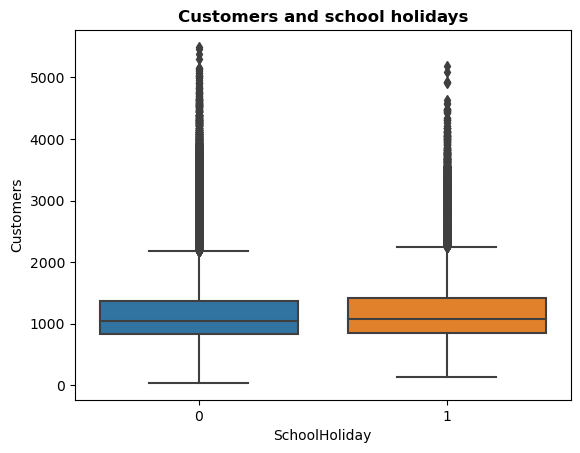

In [15]:
sns.boxplot(data=merged_sales, x='SchoolHoliday',y='Customers')
plt.title('Customers and school holidays', fontweight='bold')

In [18]:
holidays = merged_sales[merged_sales['StateHoliday'] != 0]
renamed = holidays.replace('a', 'Public').replace('b', 'Easter' ).replace('c', 'Christmas')
sns.boxplot(data=renamed, x='StateHoliday',y='Customers')
plt.title('Customers and StateHoliday', fontweight='bold')

Text(0.5, 1.0, 'Customers and StateHoliday')

Holidays have almost no impact on sales as all the medians of the holidays are similar and there is no significant difference 

# Modelling